In [ ]:
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Credentials
from credentials import * 
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [ ]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="JustinTrudeau", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @AnitaOakville: Canada’s #COVID19 vaccine agreements with both @pfizer &amp; @moderna_tx build on our government’s unrelenting efforts to pr…

RT @AnitaOakville: Les accords du 🇨🇦 pour les vaccins contre la #COVID19 avec @pfizer et @moderna_tx s'appuient sur les efforts en cours de…

RT @cathmckenna: 🔴 Live now

https://t.co/yoNYkYIES4 https://t.co/kORzirqcTQ

RT @cathmckenna: 🔴 en direct maintenant 

https://t.co/yoNYkYIES4 https://t.co/18yxivpP9A

RT @BernJordanMP: It’s official! You can apply for the Fish Harvester Benefit &amp; Grant starting August 24. We've been working around the clo…



In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(df.head(10))

,Tweets
0,RT @AnitaOakville: Canada’s #COVID19 vaccine a...
1,RT @AnitaOakville: Les accords du 🇨🇦 pour les ...
2,RT @cathmckenna: 🔴 Live now\n\nhttps://t.co/yo...
3,RT @cathmckenna: 🔴 en direct maintenant \n\nht...
4,RT @BernJordanMP: It’s official! You can apply...
5,RT @BernJordanMP: C'est officiel! Vous pouvez ...
6,I called @FureyAndrew earlier today to congrat...
7,J’ai appelé @FureyAndrew pour le féliciter d’ê...
8,RT @PattyHajdu: Wearing a non-medical mask can...
9,RT @PattyHajdu: Porter un masque non médical p...


In [ ]:
print(tweets[0].user)

In [ ]:
df['len']  = np.array([len(tweet.text) for tweet in tweets])
df['Language']   = np.array([tweet.lang for tweet in tweets])
df['Date'] = np.array([tweet.created_at for tweet in tweets])
df['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
df['ReTweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets
195,"RT @CQualtro: Aujourd'hui, notre gouvernement ...",140,fr,2020-07-17 20:11:15,0,24
196,"Yesterday, we announced the Safe Restart Agree...",140,en,2020-07-17 15:57:32,1309,247
197,"Hier, on a annoncé un accord sur la relance sé...",140,fr,2020-07-17 15:57:19,213,30
198,RT @CPHO_Canada: As we adjust to a new life wi...,140,en,2020-07-17 15:09:15,0,174
199,RT @ACSP_Canada: Pendant que nous nous adapton...,140,fr,2020-07-17 15:09:12,0,38


In [ ]:
from textblob import TextBlob
import re

def find_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
df['Sentiment'] = np.array([ find_sentiment(tweet) for tweet in df['Tweets'] ])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
195,"RT @CQualtro: Aujourd'hui, notre gouvernement ...",140,fr,2020-07-17 20:11:15,0,24,1
196,"Yesterday, we announced the Safe Restart Agree...",140,en,2020-07-17 15:57:32,1309,247,1
197,"Hier, on a annoncé un accord sur la relance sé...",140,fr,2020-07-17 15:57:19,213,30,0
198,RT @CPHO_Canada: As we adjust to a new life wi...,140,en,2020-07-17 15:09:15,0,174,1
199,RT @ACSP_Canada: Pendant que nous nous adapton...,140,fr,2020-07-17 15:09:12,0,38,0


In [ ]:
lang = df['Language'].value_counts()
lang

fr    101
en     99
Name: Language, dtype: int64

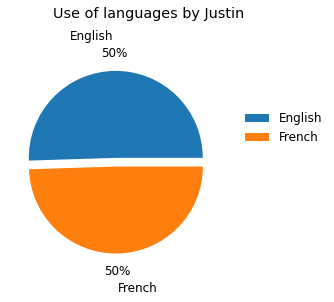

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=12

labels = ['English', 'French']

ax.pie(lang, explode=(0.1,0), labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4, rotatelabels=False)

ax.set_title("Use of languages by Justin", pad=40, x=0.65)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [ ]:
#Top 20% Tweets likeds
themes = df.sort_values('Likes', ascending=False).head(40)
liked_lang = themes['Language'].value_counts()

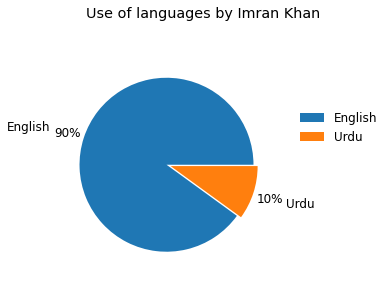

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=12

labels = ['English', 'Urdu']
ax.pie(liked_lang, explode=(0.05,0), labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4, rotatelabels=False)

ax.set_title("Use of languages by Imran Khan", pad=40, x=0.65)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [ ]:
avg = np.mean(df['len'])
allowance = avg/280*100
allowance = ("%.2f" % allowance)
print(f"The average length of the tweets is {avg} which is {allowance}% the maximum length allowed.")

The average length of the tweets is 137.25 which is 49.02% the maximum length allowed.


In [ ]:
most_liked = df[df.Likes == np.max(df['Likes'])].Tweets
most_retweeted = df[df.ReTweets == np.max(df['ReTweets'])].Tweets

In [ ]:
print(f"The most liked Tweet is:\n {most_liked}")

The most liked Tweet is:
 22    Absolutely tragic news coming out of Beirut. C...
Name: Tweets, dtype: object


In [ ]:
print(f"The most retweeted Tweet is:\n {most_retweeted}")

The most retweeted Tweet is:
 22    Absolutely tragic news coming out of Beirut. C...
Name: Tweets, dtype: object


In [ ]:
time_liked = pd.Series(df['Likes'].values, index=df['Date'])
time_retweet = pd.Series(df['ReTweets'].values, index=df['Date'])

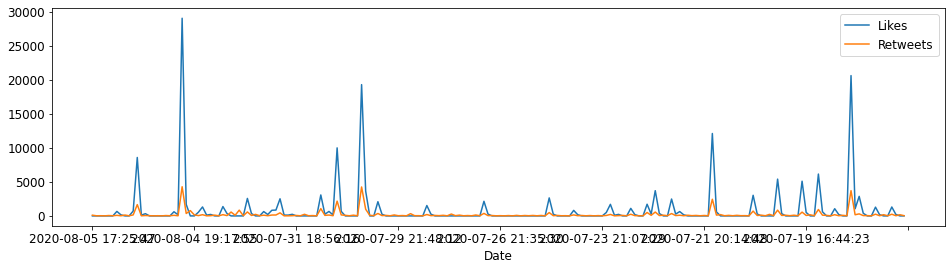

In [ ]:
time_liked.plot(figsize=(16,4), label="Likes", legend=True)
time_retweet.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
Total_likes = df['Likes'].sum()
Total_retweets = df['ReTweets'].sum()

In [ ]:
df.sort_values('Likes', ascending=False).head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
22,Absolutely tragic news coming out of Beirut. C...,139,en,2020-08-04 19:46:36,29041,4286,-1,Absolutely tragic news coming out of Beirut. C...
186,John Lewis was a fearless advocate for what he...,140,en,2020-07-18 18:15:58,20614,3714,1,John Lewis was a fearless advocate for what he...
66,To all Muslim Canadians beginning their celebr...,140,en,2020-07-30 23:11:41,19287,4253,0,To all Muslim Canadians beginning their celebr...
152,COVID-19 remains a serious health threat. We’r...,140,en,2020-07-21 17:18:30,12110,2445,-1,COVID-19 remains a serious health threat. We’r...
60,Many Muslim families are celebrating Eid al-Ad...,139,en,2020-07-31 14:05:42,9996,2172,1,Many Muslim families are celebrating Eid al-Ad...


The total number of likes are  179294
The total number of retweets are  42090




<BarContainer object of 1 artists>

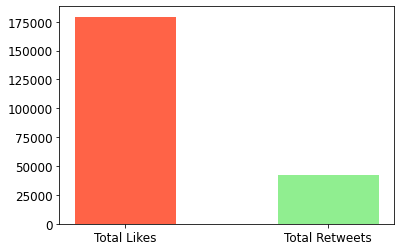

In [ ]:
ax = plt.subplot()
print('The total number of likes are ', Total_likes)
print('The total number of retweets are ', Total_retweets)
print('\n')
ax.bar('Total Likes', Total_likes, width=0.5, color='tomato', align='center')
ax.bar('Total Retweets', Total_retweets, width=0.5, color='lightgreen', align='center')

In [ ]:
#Sentiment Analysis
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets)/200*100
neu_tweets_perc = len(neu_tweets)/200*100
neg_tweets_perc = len(neg_tweets)/200*100

<BarContainer object of 1 artists>

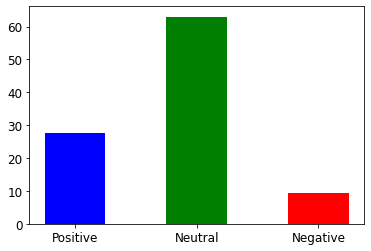

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df['Tweets Cleaned'] = df.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()
Eng_Tweets = df[df['Language'] == 'en']
Eng_Tweets.head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
0,RT @AnitaOakville: Canada’s #COVID19 vaccine a...,144,en,2020-08-05 17:25:47,0,109,0,RT Canada’s #COVID19 vaccine agreements with ...
2,RT @cathmckenna: 🔴 Live now\n\nhttps://t.co/yo...,76,en,2020-08-05 15:25:19,0,29,1,RT 🔴 Live now
4,RT @BernJordanMP: It’s official! You can apply...,144,en,2020-08-05 14:39:27,0,56,0,RT It’s official! You can apply for the Fish ...
6,I called @FureyAndrew earlier today to congrat...,139,en,2020-08-05 01:34:52,662,83,1,I called earlier today to congratulate him on...
8,RT @PattyHajdu: Wearing a non-medical mask can...,140,en,2020-08-05 01:33:15,0,125,0,RT Wearing a non-medical mask can help reduce...


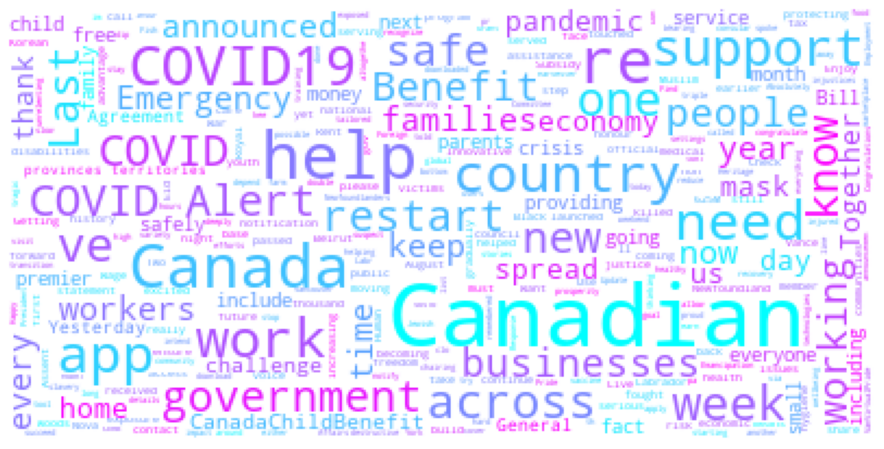

In [98]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "today", "RT", "talk", "many", "Dear", "hello", "watch"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, colormap="cool", background_color="White", max_words=500).generate(Eng_Tweets['Tweets Cleaned'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()

In [ ]:
df.dtypes

Tweets                    object
len                        int64
Language                  object
Date              datetime64[ns]
Likes                      int64
ReTweets                   int64
Sentiment                  int64
Tweets Cleaned            object
dtype: object

# Covid

In [ ]:
Eng_Tweets = df[df['Language'] == 'en']
len(Eng_Tweets)

99

In [ ]:
covid = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID')]
covid_19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID-19')]
covid19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID19')]
pandemic = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('pandemic')]
coronavirus = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('coronavirus')]
lockdown = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('lockdown')]
covid_df = pd.concat([covid, covid_19, covid19, pandemic,coronavirus, lockdown])

In [ ]:
print('Total number of entries related to covid are', len(covid_df))

Total number of entries related to covid are 38


In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 17


In [ ]:
covid_df.drop_duplicates(subset ="Tweets", inplace = True) 

In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 0


In [ ]:
print('Total number of entries for the given words, after removing duplicates, are', len(covid_df))

Total number of entries for the given words, after removing duplicates, are 21


In [ ]:
covid_df.head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
0,RT @AnitaOakville: Canada’s #COVID19 vaccine a...,144,en,2020-08-05 17:25:47,0,109,0,RT Canada’s #COVID19 vaccine agreements with ...
8,RT @PattyHajdu: Wearing a non-medical mask can...,140,en,2020-08-05 01:33:15,0,125,0,RT Wearing a non-medical mask can help reduce...
11,"Last week, we launched the COVID Alert app. It...",140,en,2020-08-05 00:33:52,8586,1660,1,"Last week, we launched the COVID Alert app. It..."
18,RT @GovCanHealth: [1/2] If you suspect you hav...,140,en,2020-08-04 23:51:16,0,53,-1,RT [1/2] If you suspect you have been exposed...
30,RT @MaryamMonsef: Have you downloaded the new ...,140,en,2020-08-03 01:38:30,0,110,1,RT Have you downloaded the new COVID Alert Ap...


In [ ]:
covid_df.reset_index(drop=True, inplace=True)

In [ ]:
#Sentiment Analysis
pos_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] > 0]
neu_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] == 0]
neg_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets_covid)/21*100
neu_tweets_perc = len(neu_tweets_covid)/21*100
neg_tweets_perc = len(neg_tweets_covid)/21*100

<BarContainer object of 1 artists>

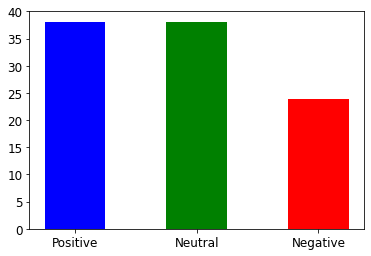

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')